# **12. Algoritmo de Grover**

# **Dive in Learning**

# ***Diplomado en Computación y Programación Cuántica***

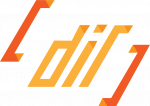

In [ ]:
!pip install qiskit --quiet
!pip install qiskit[visualization] --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 87.3 MB/s eta 0:00:00


# **Algoritmo de Grover**



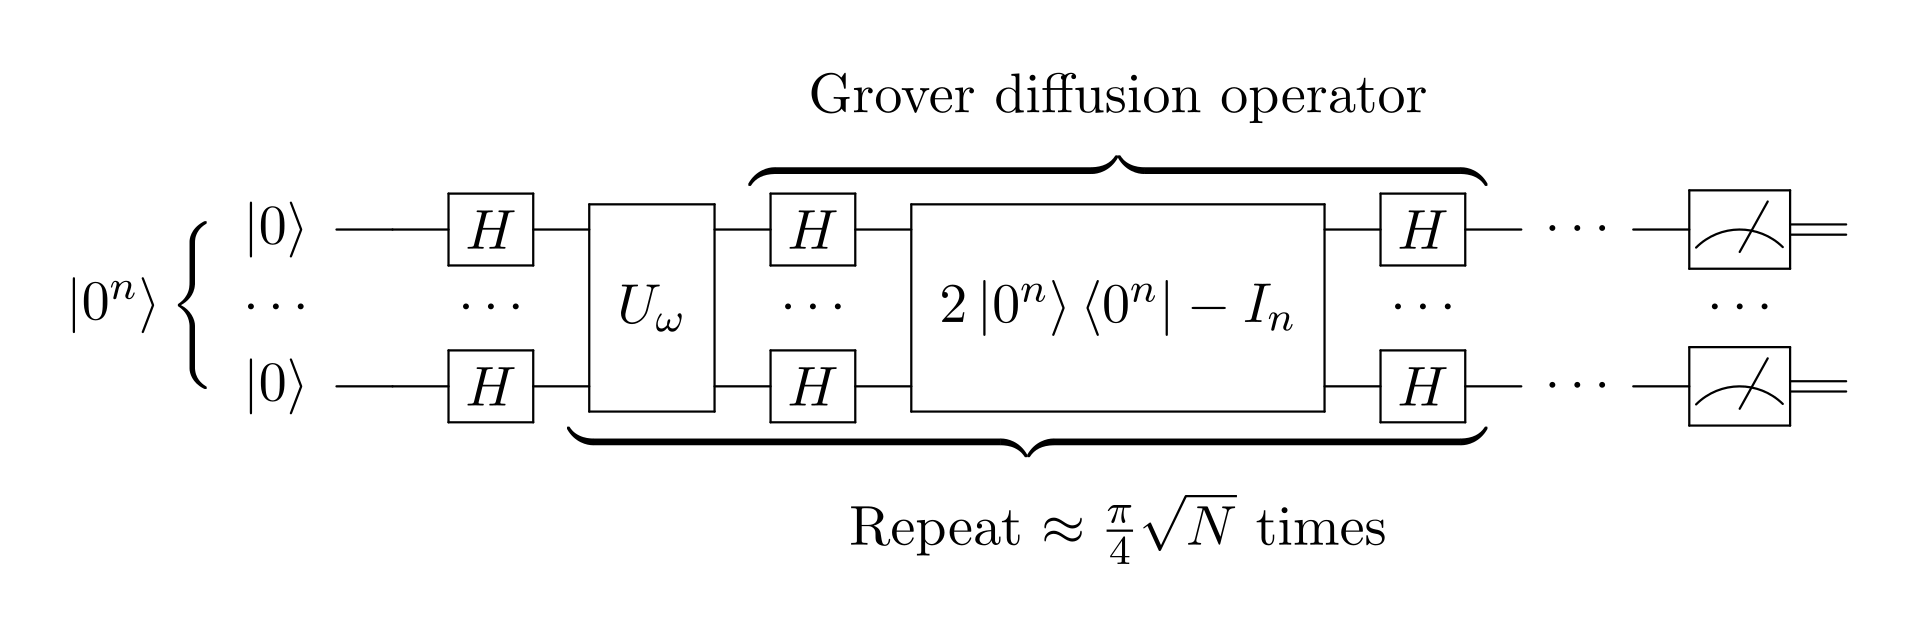

# **Introducción**

Un tipo de problema computacional muy común es la búsqueda de información.

| Nombre  | Número |
| ---     | ---    |
| Balbina | 31     |
| Carmen  | 27     |
| Ernesto | 42     |
| Noel    | 113    |
| Omar    | 6      |

Si queremos buscar qué numero tiene Carmen, podemos aprovechar el orden para encontrar su entrada de forma rápida, en particular, en $\mathcal{O}\left(\log\left(N\right)\right)$ consultas.

Sin embargo, si queremos, por ejemplo, buscar quién tiene el número $113$ en la lista anterior, lo mejor que podemos hacer clásicamente es consultar elementos de forma aleatoria hasta conseguir encontrar el que buscamos tras, en promedio, $\frac{N}{2}$ consultas ($\mathcal{O}\left(N\right)$).

En computación cuántica es posible aprovechar la superposición y la interferencia de forma que, utilizando el **algoritmo de Grover**, se encuentre el elemento buscado en $\mathcal{O}\left(\sqrt{N}\right)$ consultas.



Para hacerlo, será necesario codificar de alguna manera la base de datos en un estado cuántico
\begin{equation*}
\vert s\rangle = \frac{1}{\sqrt{5}} \left(\vert \text{Balbina}\rangle\vert 31\rangle + \vert\text{Carmen}\rangle\vert 27\rangle +\vert\text{Ernesto}\rangle\vert 42\rangle + \vert\text{Noel}\rangle\vert 113\rangle + \vert\text{Omar}\rangle\vert 6\rangle\right),
\end{equation*}

y ser capaz de implementar un circuito cuántico $G_w$ que aumente significativamente la probabilidad de medir el valor $w$ en el registro de búsqueda, es decir,

$$
G_{w=113}\vert s\rangle \approx \vert\text{Noel}\rangle\vert 113\rangle
$$

# **La “base de datos”**

Vamos a suponer por simplicidad que nuestra base de datos está formada por todas las cadenas de $n$ bits. Por ejemplo, en el caso de $n=2$, tendremos los elementos $00$, $01$, $10$ y $11$, que en decimal representan los números $0$, $1$, $2$ y $3$. Esto quiere decir que habrá un total de $N=2^n$ elementos.

**Para hacer esto, el primer paso es codificar la base de datos en un estado cuántico.** En este caso es muy sencillo, ya que podemos identificar cada elemento $x$ con un estado $\vert x\rangle$ de la base  computacional (por ejemplo, el elemento $00$ con el estado $\vert 00\rangle$). **Así, podremos representar la base de datos con la superposición uniforme.**

\begin{equation*}
\vert s\rangle = H^{\otimes n}\vert 0\rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \vert x\rangle.
\end{equation*}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector

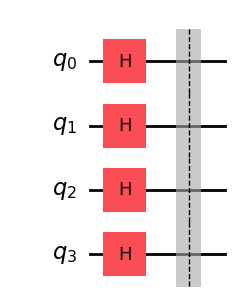

In [ ]:
# Creamos nuestra "base de datos"
# Elegimos n
n = 4

# Definimos el circuito con n qubits (y n bits)
s_circuit = QuantumCircuit(n)

# Aplicamos puertas H en todos los qubits

for i in range(n):
    s_circuit.h(i)

s_circuit.barrier()

# Dibujamos el circuito
s_circuit.draw('mpl')

# **Las soluciones**

Consideremos un conjunto $W=\left\{w_i\right\}_{i=1}^d$ de $d$ elementos **que satisfacen ciertos criterios de búsqueda.** Para identificar los elementos de $W$ introducimos una función $f_w(x)$ definida como

\begin{equation}
f_w(x) = \left\{ \begin{array}{lcc}
             1 &   si  & x \in W \\
              0 &  si & x \not\in W \end{array}
   \right..
\end{equation}

Cuánticamente, escribimos el estado buscado como un vector unitario compuesto por todos los elementos que son solución,
\begin{equation*}
\vert w\rangle =\frac{1}{\sqrt{d}}\sum_{x \in W}\vert x\rangle.
\end{equation*}

 Si consideramos $\vert s^{\prime}\rangle = \frac{1}{\sqrt{N-d}} \sum_{x \notin W} \vert x\rangle$, es decir, un vector unitario compuesto por todos los elementos que no son solución, podemos reescribir $\vert s\rangle$ de una forma más conveniente

\begin{equation*}
\vert s\rangle = \frac{1}{\sqrt{N}}\sum_x \vert x\rangle = \frac{1}{\sqrt{N}}\left(\sum_{x \in W} \vert x\rangle + \sum_{x \not\in W} \vert x\rangle \right) = \sqrt{\frac{d}{N}} \vert w\rangle + \sqrt{\frac{N-d}{N}} \vert s^{\prime}\rangle.
\end{equation*}

Esto quiere decir que podemos pensar nuestro estado $\vert s\rangle$ como un vector caracterizado por el ángulo $\theta = \arcsin \sqrt{\frac{d}{N}}$ en el plano $\left\{\vert s^{\prime}\rangle, \vert w\rangle\right\}$,

\begin{equation*}
\vert s\rangle = \sin{\theta}\vert w\rangle + \cos{\theta}\vert s^{\prime}\rangle.
\end{equation*}

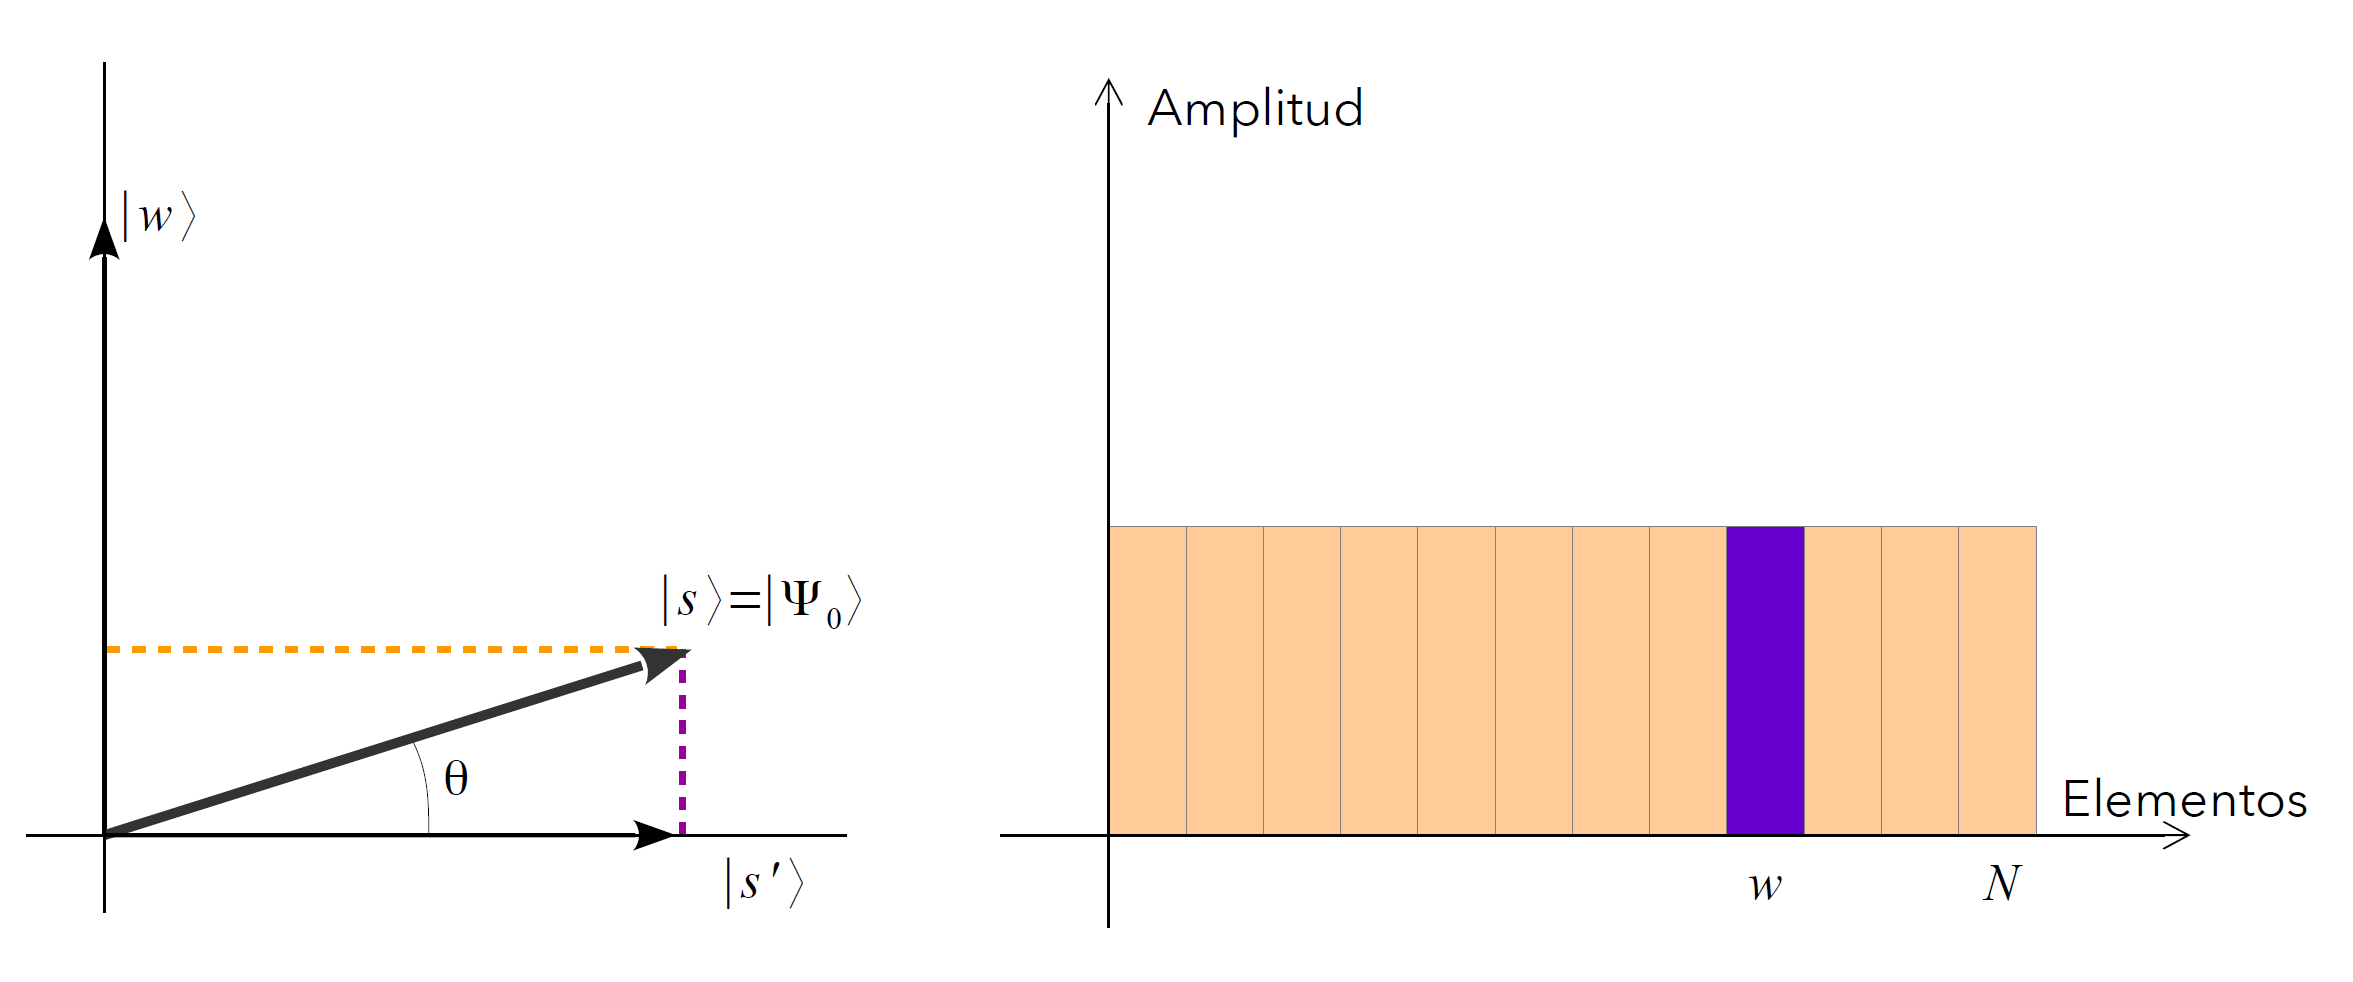

In [ ]:
Statevector(s_circuit).draw('latex',max_size=16)

<IPython.core.display.Latex object>

# **El Oráculo**

Ahora necesitamos que de alguna manera la información de la función $f_w$ se traduzca en un estado cuántico. La manera de hacer esto es a través de un *oráculo* $U_w$ que refleje el signo de la componente asociada a $\vert w\rangle$ y mantenga igual la asociada a $\vert s^{\prime}\rangle$.

\begin{equation*}
U_{w}\vert x\rangle = \left(-1\right)^{f_w(x)}\vert x\rangle.
\end{equation*}

La acción de esta reflexión actuando sobre la superposición uniforme $\vert s\rangle$ es,
\begin{equation*}
U_w\vert s\rangle = -\sqrt{\frac{d}{N}}\vert w\rangle + \sqrt{\frac{N-d}{N}}\vert s^{\prime}\rangle
\end{equation*}

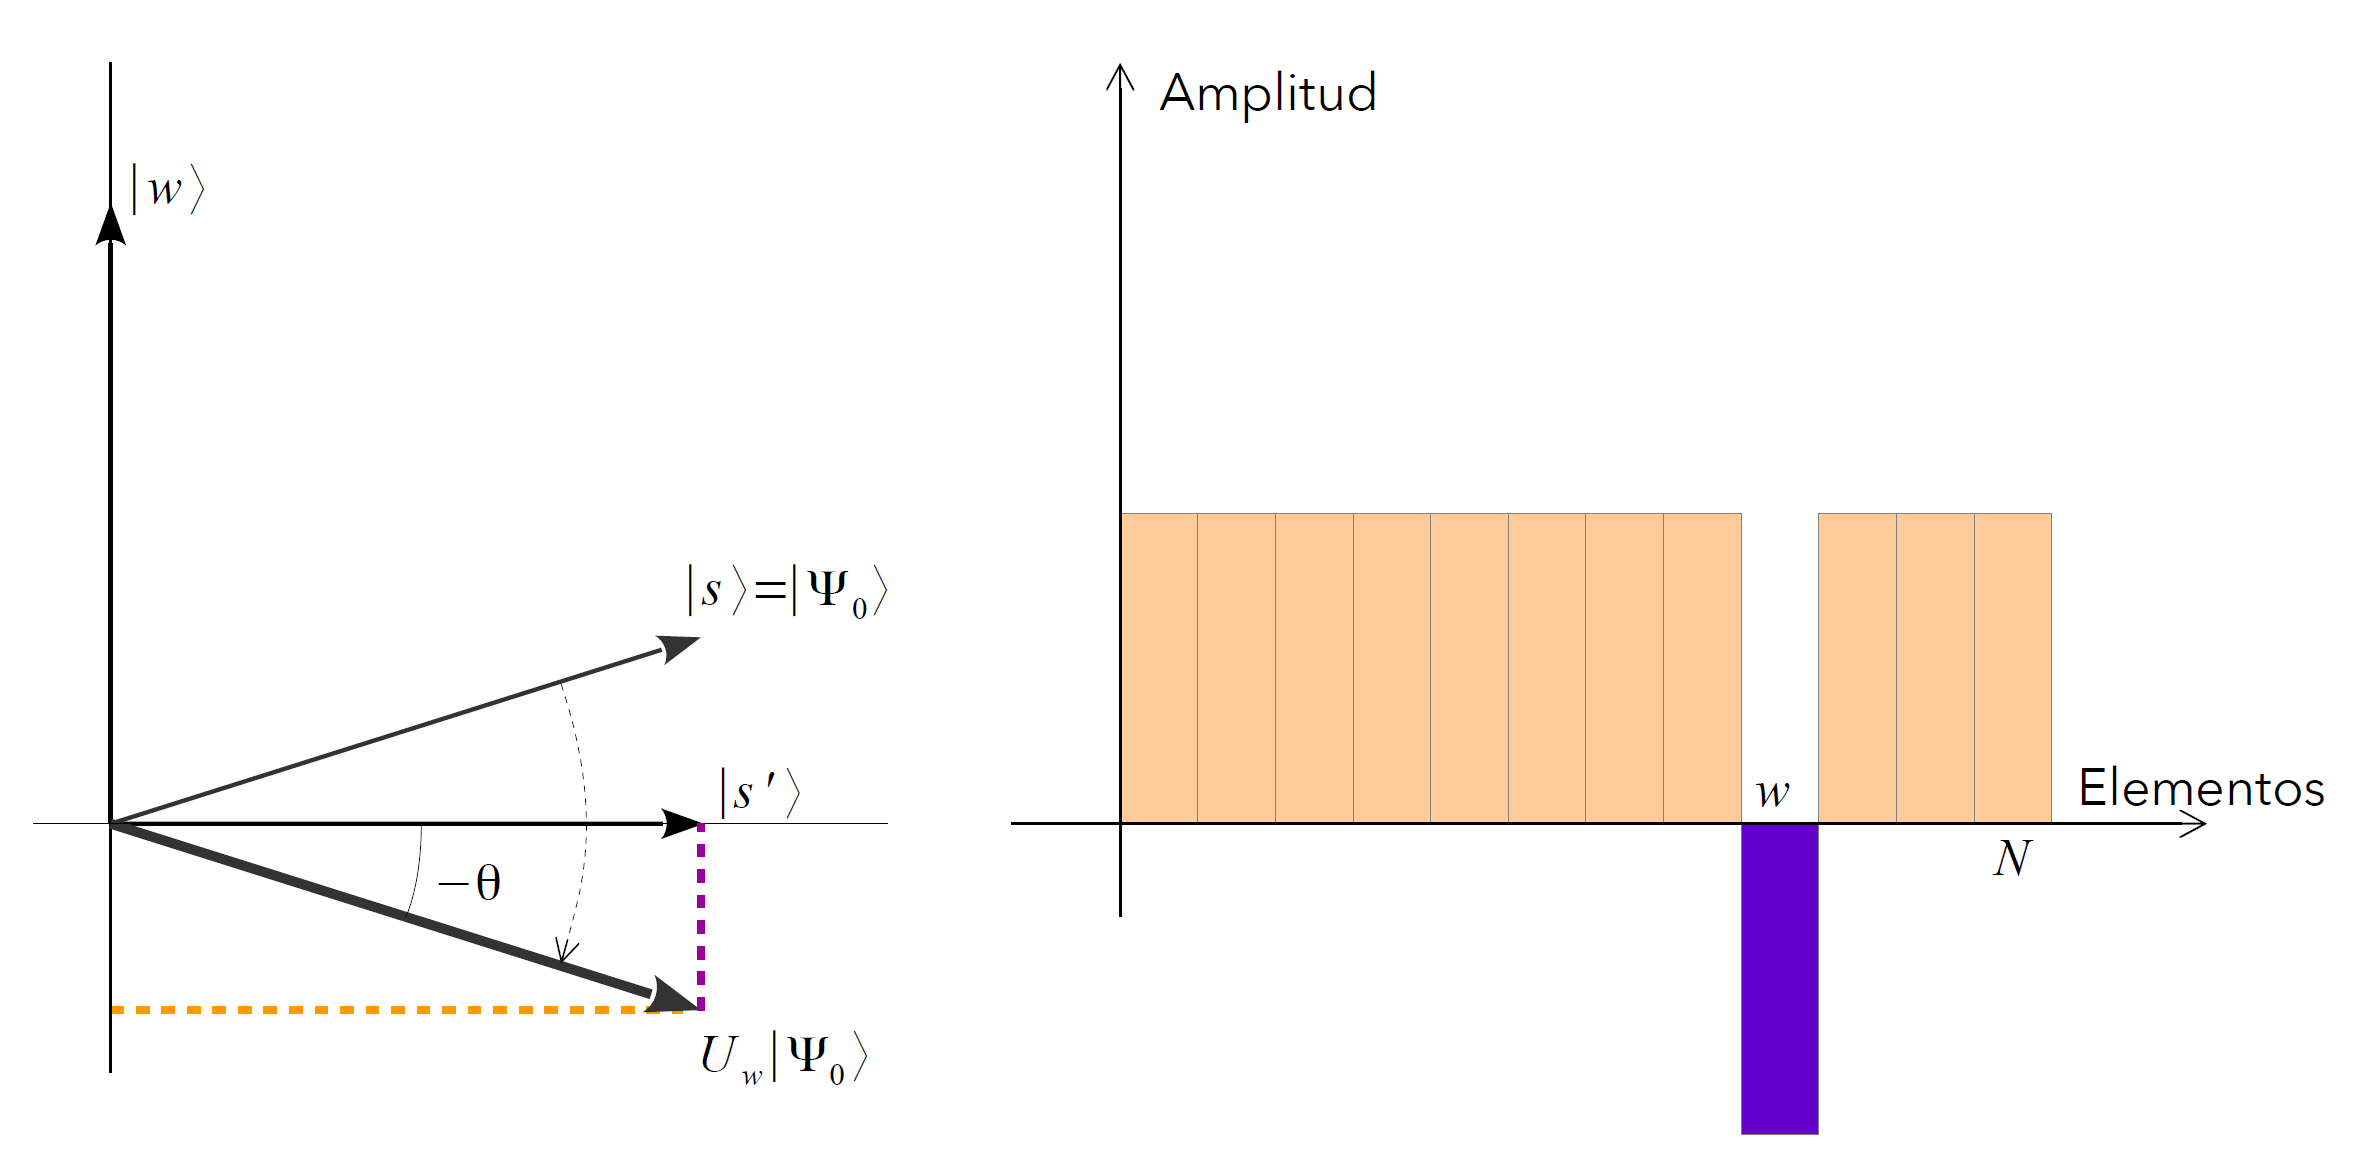

# **Reflexión con respecto a un estado**

**De forma genérica,** dado un estado $\vert\psi\rangle = V\vert 0\rangle$, el operador $U_\psi$ que refleja la componente paralela $\vert\psi\rangle$, viene dado por
    
\begin{equation*}
U_{\psi} = I - 2 \vert\psi\rangle\langle\psi\vert = I - 2 V\vert 0\rangle\langle 0\vert V^\dagger = V(I - 2 \vert 0\rangle\langle 0\vert)V^\dagger
\end{equation*}

Podemos comprobarlo viendo que la acción de $U_\psi$ sobre un estado arbitrario $\vert u\rangle = u_{\|}\vert\psi\rangle + u_{\perp} \vert\psi_\perp\rangle$  deja intacta la componente perpendicular $u_{\perp}$ pero <i>invierte</i> la paralela $u_{\|}$

\begin{align}
U_{\psi}\vert u\rangle & = \left(I- 2\vert\psi\rangle\langle\psi\vert\right)\left(u_{\|}\vert\psi\rangle +u_{\perp}\vert\psi_\perp\rangle\right)\\
         & = u_{\|}\left(\vert\psi\rangle -2\vert\psi\rangle\right)+u_{\perp}\left(\vert\psi_\perp\rangle-0\right)\\
         & = -u_{\|}\vert\psi\rangle +u_{\perp}\vert\psi_\perp\rangle
\end{align}

donde hemos usado que $\left\langle\psi|\psi_\perp\right\rangle = 0$. Es evidente que $U_{\psi_\perp} = -  U_{\psi} $    


   El resultado de este ejercicio permite construir el oráculo $U_w=\prod_i^d U_{w_i}$ de manera sencilla en el caso de conocer $\vert w_i\rangle=V_i\vert 0\rangle$. Como cada, $w_i$ es una única **bitstring**, es trivial que el operador $V$ consistirá solo en aplicar puertas $X$.


In [ ]:
# Definimos la lista de elementos w que queramos
w_list = ['0000', '1111']
d = len(w_list)

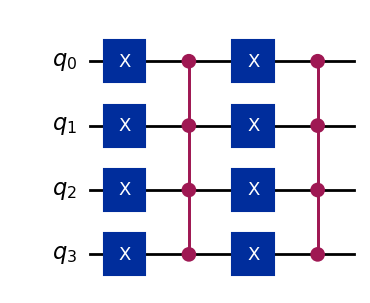

In [ ]:
from qiskit.circuit.library import ZGate
# Creamos el oráculo que marque el estado w.
U_w_circuit = QuantumCircuit(n)

# Sólo tenemos que añadir puertas X en los cúbits en los que w valga 0
# ya que cuando vale 1 se cancelan.
for k in range(d):
    w = w_list[k]
    for i in range(n-1, -1, -1):  # Recorremos los cúbits de abajo a arriba
        if w[i] == '0':
            U_w_circuit.x(i)  # Aplicamos puerta X donde w[i] = 0

    # Añadimos una puerta Z controlada por n-1 qubits
    U_w_circuit.append(ZGate().control(n-1), range(n))

    # Volvemos a aplicar puertas X en los mismos qubits para deshacer la transformación
    for i in range(n-1, -1, -1):
        if w[i] == '0':
            U_w_circuit.x(i)

U_w_circuit.draw('mpl')


Veamos que la matriz que representa este circuito sólamente cambia el signo a la componente en $\vert w\rangle$

In [ ]:
Operator(U_w_circuit).draw('latex', max_size=16)

<IPython.core.display.Latex object>

Podemos componer este circuito con el circuit que preparaba $\vert s\rangle$ para tener $U_w\vert s\rangle$.

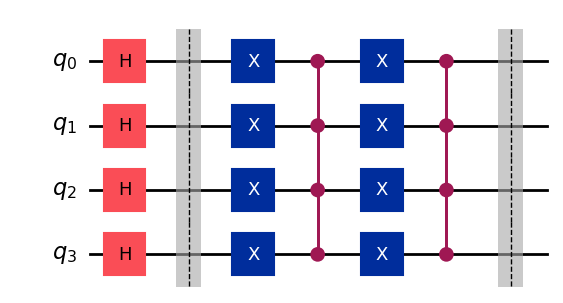

In [ ]:
Uw_s_circuit = s_circuit.compose(U_w_circuit)
Uw_s_circuit.barrier()
Uw_s_circuit.draw('mpl')

In [ ]:
Statevector(Uw_s_circuit).draw('latex',max_size=16)

<IPython.core.display.Latex object>

# **El Operador de Difusión**

**Viendo la figura anterior, resulta sencillo ver que aplicando una reflexión en torno al estado inicial $\vert s\rangle$, tendremos el trabajo hecho**. Este operador $D$, conocido como **difusor de Grover** debe de invertir las componentes perpendiculares a $\vert s\rangle$, es decir,  

$$D = U_{s_{\perp}}=-U_s=-\mathbb{1} + 2 \vert s\rangle\langle s\vert = -H^{\otimes n}\big(\mathbb{1} - 2 \vert 0\rangle\langle 0\vert \big)H^{\otimes n} = -H^{\otimes n}U_{0}H^{\otimes n}.$$

<div class="alert alert-block alert-info">
Nótese que sabemos escribir como un circuito cuántico el operador $-D=U_s$. Dado que el signo menos es, una fase global, es no físico y podemos considerar $D \sim -D$. En ciertas aplicaciones que no veremos en este curso, este signo puede llegar a ser relevante.

</div>

Podemos ver que, efectivamente, el nuevo estado $-U_sU_w \vert s\rangle$ tiene mayor proyección sobre $\vert s\rangle$

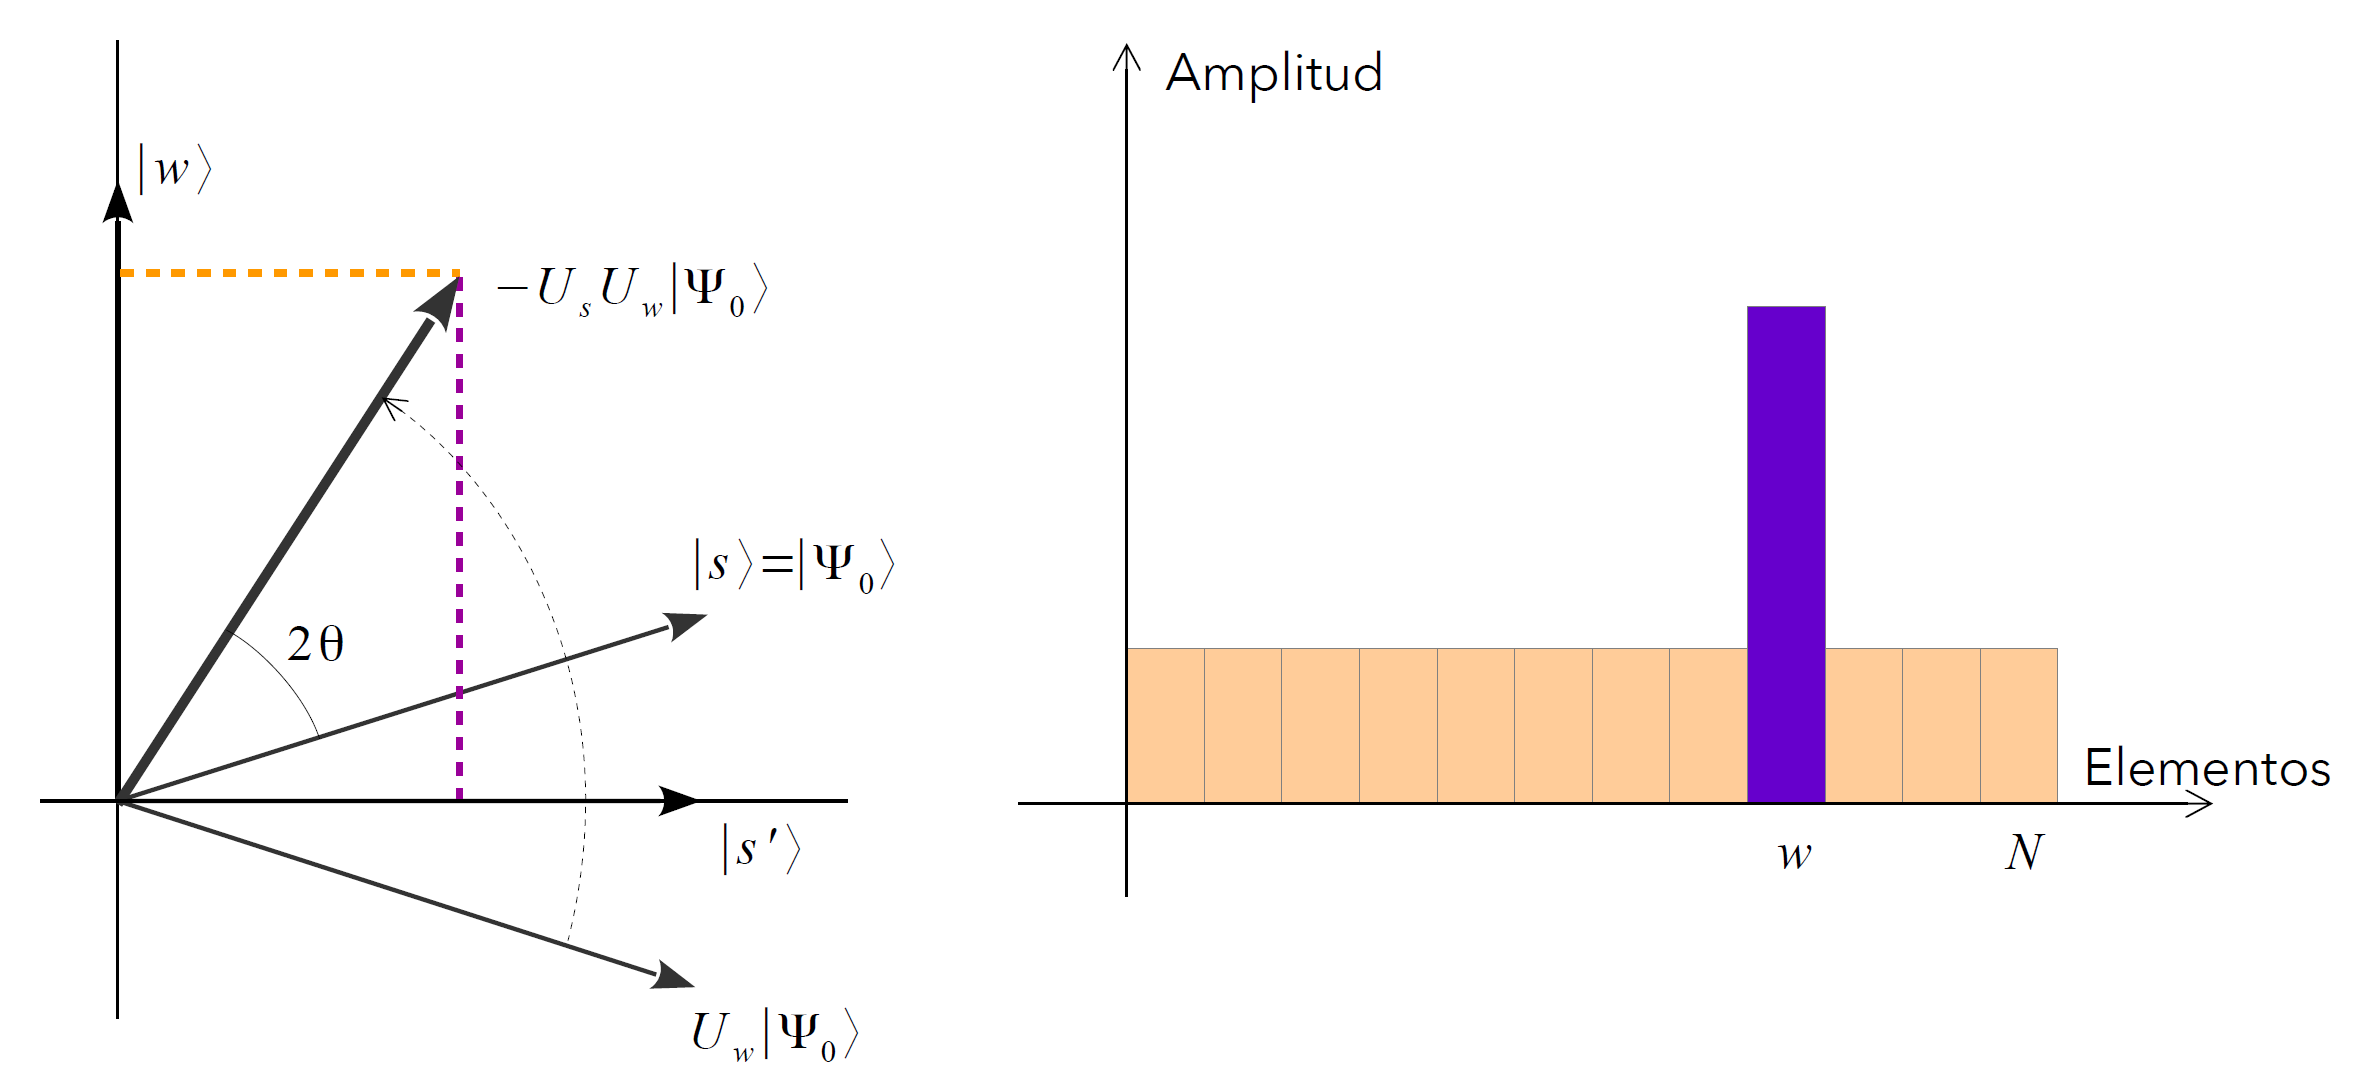

## **Ejercicio:**

Completa el código que implementa el operador $D$

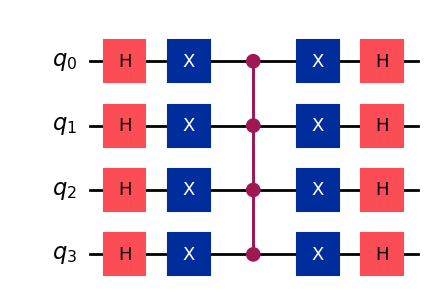

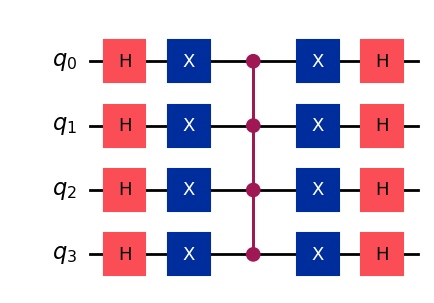

In [ ]:
# Número de qubits
n = 4

# Creamos el circuito de difusión (-D)
diffusor_circuit = QuantumCircuit(n)

# 1. Aplicamos puertas H en todos los qubits (cambia a la base de Hadamard)
for i in range(n):
    diffusor_circuit.h(i)

# 2. Aplicamos puertas X en todos los qubits (transforma |0⟩ en |1⟩ y viceversa)
for i in range(n):
    diffusor_circuit.x(i)

# 3. Aplicamos una compuerta multi-control Z (sobre el estado |1111⟩ después de X)
diffusor_circuit.append(ZGate().control(n-1), range(n))

# 4. Aplicamos de nuevo puertas X en todos los qubits (para regresar a la base original)
for i in range(n):
    diffusor_circuit.x(i)

# 5. Aplicamos puertas H en todos los qubits (para completar la transformación)
for i in range(n):
    diffusor_circuit.h(i)

# 6. Dibujamos el circuito
diffusor_circuit.draw('mpl')

In [ ]:
Statevector(diffusor_circuit).draw('latex',max_size=16)

<IPython.core.display.Latex object>

In [ ]:
Operator(diffusor_circuit).draw('latex',max_size=16)

<IPython.core.display.Latex object>

En este momento el circuito total tiene la forma

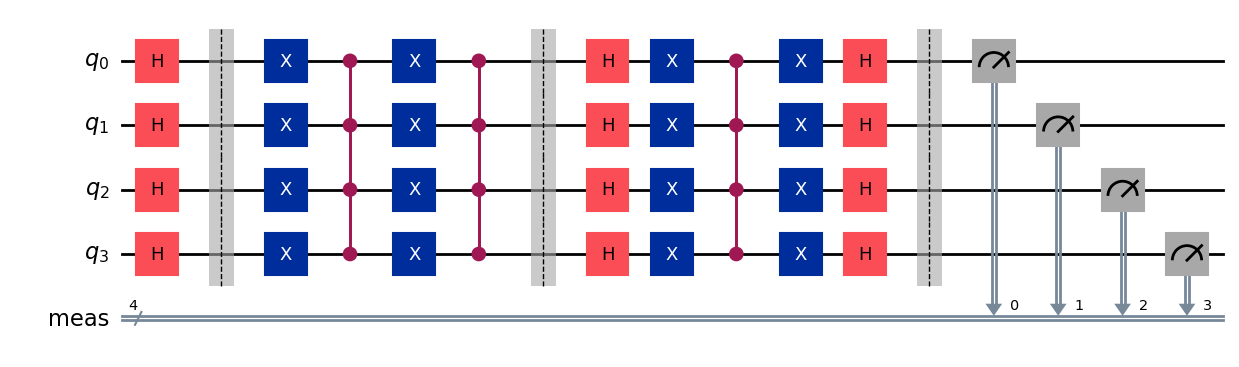

In [ ]:
# Componemos el circuito que implementa una iteración de Grover.
grover_circuit = Uw_s_circuit.compose(diffusor_circuit)

# Añadimos medidas en todos los qubits y un registro clásico para almacenar los resultados.
grover_circuit.measure_all()
grover_circuit.draw('mpl')

Qiskit nos permite convertir circuitos a puertas, así que podemos hacerlo de manera más compacta

In [ ]:
U_w = U_w_circuit.to_gate()
U_w.name = "$U_w$"
U_s = diffusor_circuit.to_gate()
U_s.name = "$U_s$"


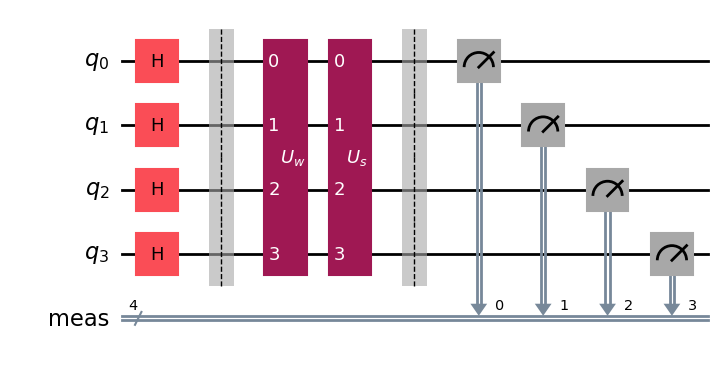

In [ ]:
# De forma más compacta
grover_circuit = s_circuit.copy()
grover_circuit.append(U_w, range(n))
grover_circuit.append(U_s, range(n))

# Almacenamos el vector de estado final. Esto hay que hacerlo antes de añadir medidas clásicas.
grover_statevector = Statevector(grover_circuit)

grover_circuit.measure_all()

grover_circuit.draw('mpl')

Podemos simular su resultado para ver que efectivamente el algoritmo funciona como esperamos.

In [ ]:
grover_statevector.draw('latex', max_size=16)

<IPython.core.display.Latex object>

O, utilizando medidas

In [ ]:
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

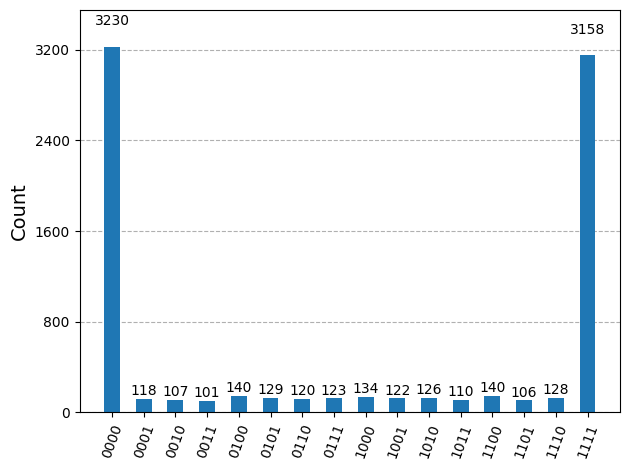

In [ ]:
# Elegimos cuántas medidas hacer
shots = 8092
# Definimos el Sampler, esto es, la manera de ejecutar el circuito para sacar el contaje al medir cada estado.
# En este caso vamos a utilizar el StatevectorSampler, que simula clásicamente el circuito, pero aquí podríamos por ejemplo llamar a un
# ordenador cuántico real.
sampler = StatevectorSampler()
job = sampler.run([grover_circuit], shots=shots) # sampler.run([lista_de_circuitos], shots=número_de_shots)
counts = job.result()[0].data.meas.get_counts()  #job.result()[índice_del_circuito].data.nombre_del_registro.get_counts()
# counts es un diccionario formado como {'valor_medido': veces_medido}. Podemos hacer un histograma con la utilidad plot_histogram
plot_histogram(counts)

# **Amplificación de Amplitud**

**Hemos conseguido aumentar la probabilidad de medir el estado buscado. Pero, ¿es suficiente para considerar que el problema está resuelto? ¿Podemos mejorar el resultado?**

La clave consiste en darse cuenta de que el operador $G=-U_sU_w$ es en realidad, como se puede ver gráficamente, una rotación de un ángulo $2\theta$.

$$G=\begin{pmatrix}
\cos{2\theta} & \sin{2\theta}\\
-\sin{2\theta} & \cos{2\theta}
\end{pmatrix}.$$

<details>
    <summary><p style="color:blue"> <b>Demostración (hacer click)</b> </p></summary>
    
Por inducción, tras aplicar el operador de Grover $k$ veces, tendremos
    
\begin{align*}
G^k\vert s\rangle & = a_k\vert w\rangle + b_k \vert s^{\prime}\rangle \\\\
&= -U_sU_w\left(a_{k-1}\vert w\rangle + b_{k-1}\vert s^{\prime}\rangle\right) \\\\
&= \left(-\mathbb{1} + 2 \vert s\rangle\langle s\vert\right)\left(-a_{k-1}\vert w\rangle + b_{k-1}\vert s^{\prime}\rangle\right)\\\\
&= \left(a_{k-1}\vert w\rangle - b_{k-1}\vert s^{\prime}\rangle\right) + 2\vert s\rangle \left(-a_{k-1}\left\langle s | w\right\rangle+b_{k-1}\left\langle s | s^\prime \right\rangle\right) \\\\
&= a_{k-1}\vert w\rangle - b_{k-1}\vert s^{\prime}\rangle + 2\left(\frac{1}{\sqrt{N}}\vert w\rangle + \sqrt{\frac{N-1}{N}}\vert s^{\prime}\rangle\right) \left(-a_{k-1}\frac{1}{\sqrt{N}}+b_{k-1}\sqrt{\frac{N-1}{N}}\right) \\\\
&=\left(a_{k-1} - \frac{2}{N} a_{k-1} + 2\frac{\sqrt{N-1}}{N}\right)\vert w\rangle + \left(b_{k-1} - 2\frac{\sqrt{N-1}}{N}a_{k-1} + 2\frac{N-1}{N}b_{k-1}\right)\vert s^{\prime}\rangle.
\end{align*}
    
Agrupando términos, esta ecuación se puede escribir en forma matricial como

$$
\begin{pmatrix}
a_k\\
b_k
\end{pmatrix}
=
\begin{pmatrix}
\frac{N-2}{N} & 2\frac{\sqrt{N-1}}{N}\\
-2\frac{\sqrt{N-1}}{N} & \frac{N-2}{N}
\end{pmatrix}\begin{pmatrix}
a_{k-1}\\
b_{k-1}
\end{pmatrix}.
$$
    
Es sencillo ver que esta matriz tiene determinante unidad, es decir, ha de ser una matriz de rotación
    
$$\text{det}(G)=\frac{\left(N-2\right)^2}{N^2} + 4\frac{N-1}{N^2} = \frac{N^2 - 4N + 4}{N^2} + \frac{4N-4}{N^2} = 1$$
    
Recordando
    
$$\sin{\theta} = \frac{1}{\sqrt{N}}, \quad \cos{\theta}=\sqrt{\frac{N-1}{N}}$$

$$\frac{N-2}{N}=\cos^2{\theta} - \sin^2{\theta} = \cos{2\theta}$$

$$2\frac{\sqrt{N-1}}{N}=2\sin{\theta}\cos{\theta} = \sin{2\theta}$$
    
se llega a
    
$$G=\begin{pmatrix}
\cos{2\theta} & \sin{2\theta}\\
-\sin{2\theta} & \cos{2\theta}
\end{pmatrix}.$$
</details>



Al identificar $G$ como una matriz de rotación, resulta claro que su acción sobre cualquier estado será rotarlo en el plano $\left\{\vert w\rangle, \vert s^\prime\rangle\right\}$,

$$G^k\vert s\rangle = \sin{\left(\left(2k+1\right)\theta\right)}\vert w\rangle + \cos{\left(\left(2k+1\right)\theta\right)}\vert s^\prime\rangle.$$

Nos interesa saber cuál es el número de veces que hay que aplicar el operador de Grover para maximizar la probabilidad de medir $\vert w\rangle$. **Esto es, maximizar la cantidad,**

$$P_{w,k}=\sin^2\left[\left(2k+1\right)\theta\right].$$

Si $k$ fuese un número real, es evidente que el resultado sería $k=\frac{\pi}{4\theta}-\frac{1}{2}$. Sin embargo, $k$ es un número entero, así que hay que examinar su parte entera. Se puede demostrar, aunque es un tanto engorroso, que $k=\left[\frac{\pi}{4\theta}\right]$. En el límite $N\gg 1 \Rightarrow \sin\theta \approx \theta$,
    
$$ k \approx \frac{\pi}{4}\sqrt{\frac{N}{d}} $$
<br>
</div>


Esto supone un crecimiento $\mathcal{O}(\sqrt{N})$ en lugar de $\mathcal{O}(N)$ que es lo que esperaríamos clásicamente.

<div class="alert alert-block alert-info">
La manera intuitiva de entender por qué sucede esto es que en el límite $N>>1$, el ángulo $\theta$ se hace pequeño por lo que el crecimiento de la amplitud se vuelve lineal, lo que implica que la probabilidad crezca cuadráticamente. Este truco se conoce como <b> amplificación de amplitud </b>.
    
</div>

## **Ejercicio:**

Crear un código que implemente $k$ iteraciones de Grover

In [ ]:
G_circuit = U_w_circuit.compose(diffusor_circuit)
G = G_circuit.to_gate()
G.name = "$G$"

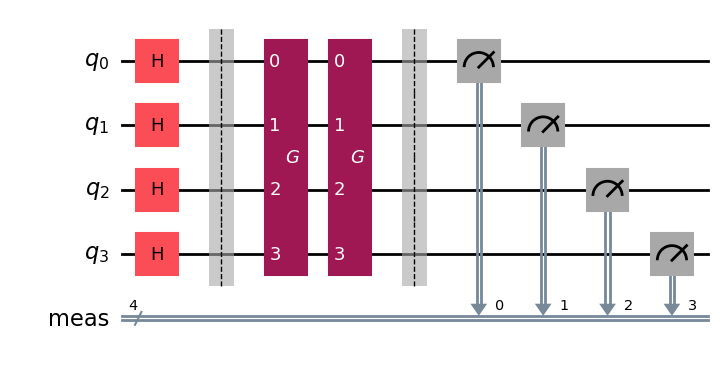

In [ ]:
k = 2

grover_circuit = s_circuit.copy()
for _ in range(k):
    grover_circuit.append(G, range(n))
grover_circuit.measure_all()
grover_circuit.draw('mpl')

In [ ]:
def run_grover_algorithm(s_circuit, U_w, U_s, k, shots=8092):
    """
    Dados el circuito inicial y las puertas que implementan los operadores U_w y U_s,
    Crea y ejecuta el circuito del algoritmo de Grover con k iteraciones
    """
    grover_circuit = s_circuit.copy()
    for _ in range(k):
        grover_circuit.append(U_w, range(n))
        grover_circuit.append(U_s, range(n))
    grover_circuit.measure_all()
    grover_circuit.draw('mpl')

    job = sampler.run([grover_circuit], shots=shots)
    counts = job.result()[0].data.meas.get_counts()
    prob_w = counts[w]/shots
    return grover_circuit, counts, prob_w

La probabilidad de medir w es 47.825012


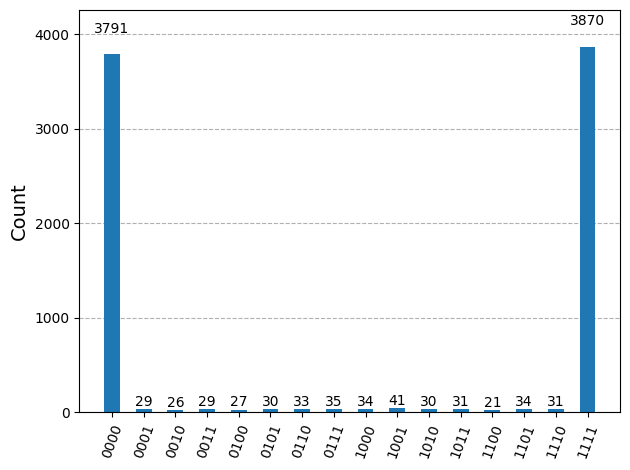

In [ ]:
grover_circuit, counts, prob_w = run_grover_algorithm(s_circuit, U_w, U_s, k, shots=8092)
print(r'La probabilidad de medir w es %f' % (100*prob_w))
plot_histogram(counts)

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>
    
Comprueba que los resultados numéricos obtenidos al variar $k$ se corresponden con la expresión analítica a la que hemos llegado
    
$$P_{w,k}=\sin^2\left[\left(2k+1\right)\theta\right].$$
    
Para ello, ejecuta la celda anterior para distintos valores de $k$ y anota las probabilidades obtenidas. Después crea una función que calcule el valor analítico de la probabilidad y representa los valores obtenidos para ver que coinciden. Si quieres también puedes hacer un test de $\chi^2$.

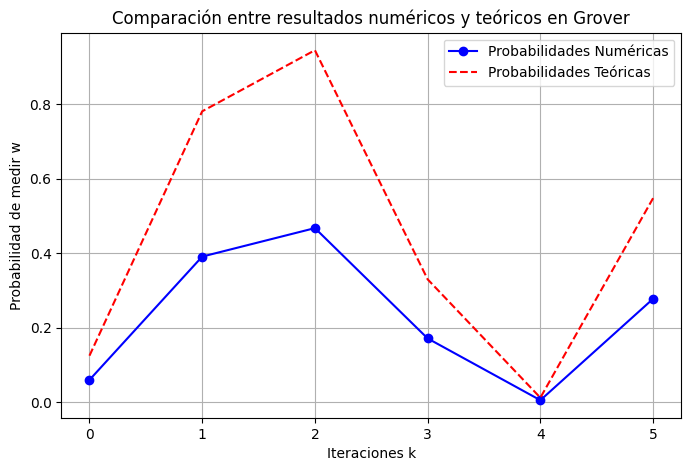

Chi^2 = 0.0004, p-value = 1.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Definimos los parámetros del problema
n = 4  # Número de qubits
N = 2**n  # Número total de estados (16)
M = 2  # Número de soluciones (w=0000, w=1111)
theta = np.arcsin(np.sqrt(M / N))  # Ángulo de rotación en el espacio de estados

# Definimos los valores de k a probar
k_vals = np.arange(0, 6)  # Probar k = 0, 1, 2, 3, 4, 5
probs_numericas = []

# Ejecutamos el algoritmo de Grover para cada k y almacenamos la probabilidad de medir w
for k in k_vals:
    _, _, prob_w = run_grover_algorithm(s_circuit, U_w, U_s, k, shots=8092)
    probs_numericas.append(prob_w)

# Convertimos a array de NumPy
probs_numericas = np.array(probs_numericas)

# Definimos la función teórica de probabilidad
def prob_fun(k, theta):
    return np.sin((2*k + 1) * theta)**2

# Calculamos los valores teóricos
probs_analiticas = prob_fun(k_vals, theta)

# Graficamos la comparación
plt.figure(figsize=(8, 5))
plt.plot(k_vals, probs_numericas, 'bo-', label="Probabilidades Numéricas")
plt.plot(k_vals, probs_analiticas, 'r--', label="Probabilidades Teóricas")
plt.xlabel("Iteraciones k")
plt.ylabel("Probabilidad de medir w")
plt.legend()
plt.grid()
plt.title("Comparación entre resultados numéricos y teóricos en Grover")
plt.show()

# Normalizamos las probabilidades para asegurarnos de que suman 1
probs_numericas /= np.sum(probs_numericas)
probs_analiticas /= np.sum(probs_analiticas)

# Test de chi-cuadrado
chi2_stat, p_value = chisquare(probs_numericas, probs_analiticas)
print(f"Chi^2 = {chi2_stat:.4f}, p-value = {p_value:.4f}")
